In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle
from scipy.signal import convolve
import matplotlib.image as image
import sys
import matplotlib.colors as colors
import matplotlib.cm as cmx
import os

In [2]:
home = os.path.expanduser("~")
sys.path.insert(1, f'{home}/Documents/Repositories/motion_anticipation_network/model')
from utils import  DOG

In [3]:
speeds = np.asarray([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9])
speeds = speeds[::2]

In [4]:

def bar(t, xc, b = 0.160, v = 1):

    if xc >=-b+v*t and xc <=b+v*t :
        return 1
    else: 
        return 0
    


# load RAM simulations

In [32]:
data = {}
cell = 50


nets_list = ['fb_linear_mV/wBA/0.0',
             'fb_linear_mV/wBA/20.0' ]


for net in nets_list:
    
    data[net] = {}

    bars = []
    tps_rf_GC_mid = []
    times = []

    Fs = []
    RBs = []
    RAs = []
    RGs = []
    VGs = []

    peaks_RG = []
    peaks_RB = []
    peaks_drive = []

    amps_RB = []
    amps_RA = []
    amps_RG = []
    amps_drive = []

    ants_RB_drive = []
    ants_RB_bar = []

    ants_RG_drive = []
    ants_RG_bar = []
    ants_drive = []

    for s in speeds: 
        fp = f'../../output/{net}/smooth_{s}'
        with open(f'{fp}/out_smooth', 'rb') as handle:
            out = pickle.load(handle)    
            
        with open(f'{fp}/params', 'rb') as handle:
            paramsi = pickle.load(handle)
            
        duration = paramsi['duration']
        dt = paramsi['dt']
        time = np.arange(0,duration,dt) #- (paramsi['spacing']*cell)/paramsi['speed']#*1000#+45
        mid_cell = int( paramsi['nb_GC_cells']/2 )
        pos_cell = paramsi['pos_rf_GC_mid'][mid_cell]
        barr = [bar(t,pos_cell, v = s) for t in time]
        tp_bar = paramsi['tps_rf_GC_mid'][mid_cell]

        peak_RB = time[np.argmax(out['RB'][50,:])]
        peak_RG = time[np.argmax(out['RG'][:])]
        peak_drive = time[np.argmax(out['F'][:])]

        amp_RB = np.max(out['RB'][50,:])
        amp_RA = np.max(out['RA'][50,:])
        amp_RG = np.max(out['RG'][:])
        amp_drive = np.max(out['F'][:])

        


        # RAM
        ant_RB_drive =  peak_drive - peak_RB
        ant_RB_bar  =  tp_bar - peak_RB

        ant_RG_drive =  peak_drive - peak_RG
        ant_RG_bar =  tp_bar - peak_RG
    
        ant_drive =  tp_bar - peak_drive

        bars.append(barr)
        tps_rf_GC_mid.append(tp_bar)
        times.append(time)

        Fs.append(out['inp'])
        RBs.append(out['VB'][50,:])
        RAs.append(out['VA'][50,:])
        VGs.append(out['VG'])
        RGs.append(out['RG'])

        peaks_RB.append(peak_RB)
        peaks_RG.append(peak_RG)
        peaks_drive.append(peak_drive)

        amps_RB.append(amp_RB)
        amps_RA.append(amp_RA)
        amps_RG.append(amp_RG)
        amps_drive.append(amp_drive)

        ants_RB_drive.append(ant_RB_drive)
        ants_RB_bar.append(ant_RB_bar)
        
        ants_RG_drive.append(ant_RG_drive)
        ants_RG_bar.append(ant_RG_bar)
        ants_drive.append(ant_drive)


    
    data[net]['peaks']={}
    data[net]['peaks']['RB'] = np.asarray(peaks_RB)
    data[net]['peaks']['RG'] = np.asarray(peaks_RG)
    data[net]['peaks']['drive'] =np.asarray( peaks_drive)  

    data[net]['amps']={}
    data[net]['amps']['RB'] = np.asarray(amps_RB)
    data[net]['amps']['RA'] = np.asarray(amps_RA)
    data[net]['amps']['RG'] = np.asarray(amps_RG)
    data[net]['amps']['VG'] = np.asarray(amps_RG)
    data[net]['amps']['drive'] =np.asarray( amps_drive)

    data[net]['ants'] ={}
    data[net]['ants']['RB_drive'] =np.asarray(ants_RB_drive)
    data[net]['ants']['RB_bar'] =np.asarray(ants_RB_bar)
    data[net]['ants']['RG_drive'] =np.asarray(ants_RG_drive)
    data[net]['ants']['RG_bar'] =np.asarray(ants_RG_bar)
    data[net]['ants']['drive'] =np.asarray(ants_drive)
    
    data[net]['RB'] = RBs
    data[net]['RA'] = RAs
    data[net]['RG'] = RGs
    data[net]['VG'] = VGs
    data[net]['F'] = Fs


    data['bars'] = bars
    data['tps_rf_mid'] = np.asarray(tps_rf_GC_mid)
    data['times'] = times


In [33]:
net = nets_list[1]
net_pool = nets_list[0]

# Figure Parameter

In [34]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 4
ms = 60

figsize_ratio = 3

figsize = (8,8)
image_format = "png"
dpi = 300
panellabel_position = [-0.07, 1.]


# FB mechanism

0.7


(-1.0, 1.0)

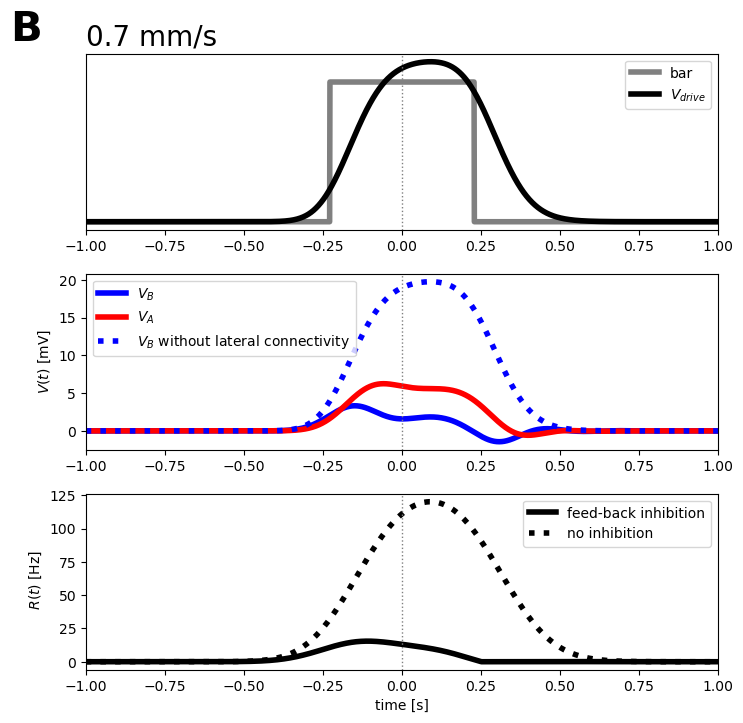

In [35]:
cbar = 'grey'
c1 = 'blue'
c2 = 'red'
speed_plot = -7
print(speeds[speed_plot])
#initialize figure
nrows = 3
ncols = 1

fig = plt.figure(figsize=figsize)
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)



fig.subplots_adjust(top=0.88,
bottom=0.11,
left=0.11,
right=0.9,
hspace=0.25,
wspace=0.48)





ax = fig.add_subplot(gs[0])
ax.set_title(f'{speeds[speed_plot]} mm/s', fontsize = fontsize_legend, loc='left')
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
          fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')



time = data['times'][speed_plot]
barr = [bar(t,pos_cell, v = speeds[speed_plot]) for t in time]

xdata = time  - pos_cell/speeds[speed_plot]
ax.plot(xdata ,barr, linewidth = lw, color = cbar, label = 'bar')
ax.plot(xdata,data[net]['F'][speed_plot]/np.max(data[net]['F'][-1]), label = '$V_{drive}$', color = 'k', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
#ax.set_ylabel('$V(t)')
ax.legend()
ax.set_yticks([])


ax = fig.add_subplot(gs[1],sharex = ax)


# ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
#           fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')



RB =data[net]['RB'][speed_plot]
RA =data[net]['RA'][speed_plot]   

# ax.plot(xdata,RB/np.max(data[net]['RB'][-1]), color = c1, linewidth = lw, label = '$V_{B}$')
ax.plot(xdata,RB, color = c1, linewidth = lw, label = '$V_{B}$')

# ax.plot(xdata,RA/np.max(data[net]['RA'][-1]), color = c2, linewidth = lw, label = '$V_{A}$')
ax.plot(xdata,RA, color = c2, linewidth = lw, label = '$V_{A}$')

# ax.plot(xdata,data[net_pool]['RB'][speed_plot]/np.max(data[net_pool]['RB'][-1]), label = '$V_{B}$ no inhibition', color = c1, linestyle = ':', linewidth = lw)
ax.plot(xdata,data[net_pool]['RB'][speed_plot], label = '$V_{B}$ without lateral connectivity', color = c1, linestyle = ':', linewidth = lw)

ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_ylabel('$V(t)$ [mV]')
ax.legend()



ax = fig.add_subplot(gs[2],sharex = ax)


# ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "D", transform=ax.transAxes,
        #   fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')


RG_pool =data[net_pool]['RG'][speed_plot]
RG =data[net]['RG'][speed_plot]
# ax.plot(time - pos_cell/speeds[speed_plot],RG/RG.max(), color = 'k', linewidth = lw, label = 'feed-back inhibition')
# ax.plot(time - pos_cell/speeds[speed_plot],RG_pool/RG_pool.max(), linestyle = ':', color = 'k', linewidth = lw, label = 'no inhibition')

ax.plot(time - pos_cell/speeds[speed_plot],RG, color = 'k', linewidth = lw, label = 'feed-back inhibition')
ax.plot(time - pos_cell/speeds[speed_plot],RG_pool, linestyle = ':', color = 'k', linewidth = lw, label = 'no inhibition')


ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.legend()
ax.set_ylabel(' $R(t)$ [Hz]')
ax.set_xlabel('time [s]')
ax.set_xlim(-1,1)


# speed scaling ganglion - NOT USED - 

Text(0, 0.5, 'R [$Hz$]')

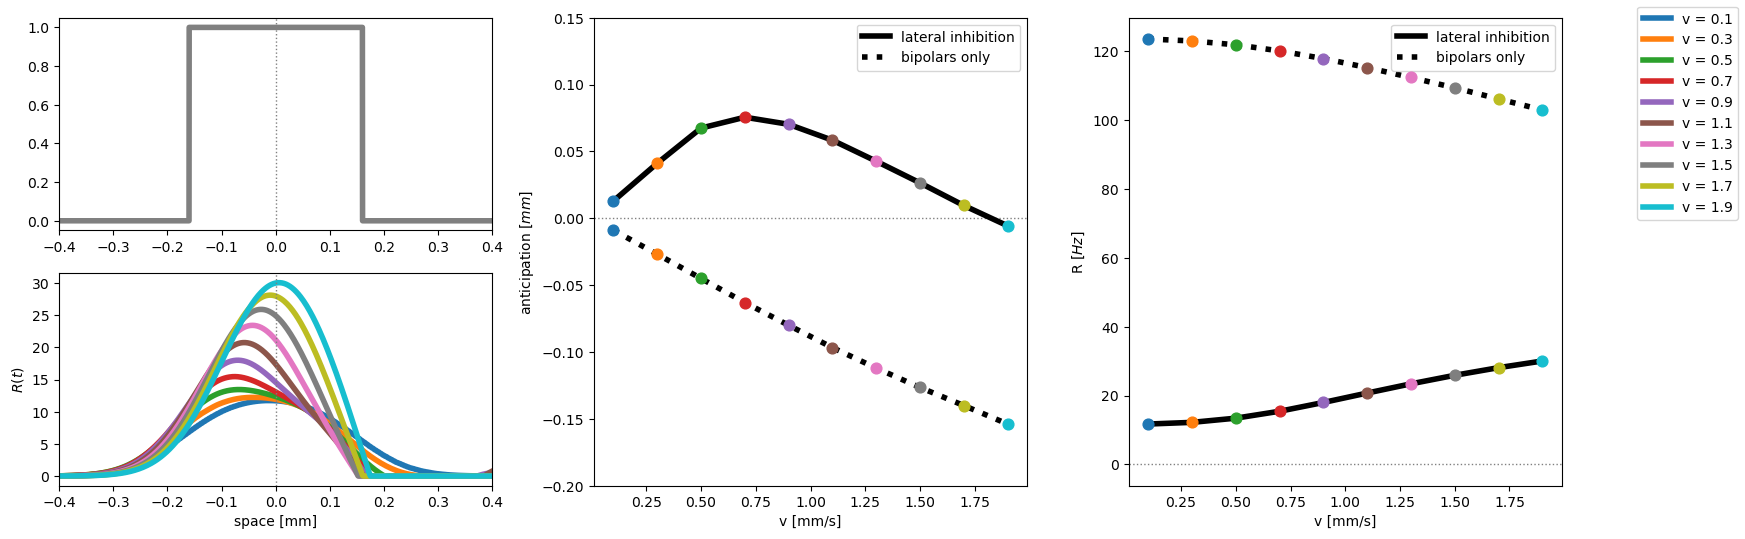

In [60]:
#initialize figure
nrows = 2
ncols = 6

fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')



fig.subplots_adjust(top=0.975,
bottom=0.195,
left=0.065,
right=0.9,
hspace=0.2,
wspace=0.61)



gs = fig.add_gridspec(nrows,ncols)


ax = fig.add_subplot(gs[0,0:2])

    #add panel labels

    #remove frames that are not needed


x = 0

ti = data['times'][x]
barr = [bar(t,pos_cell, v = speeds[x]) for t in ti]
ax.plot(ti*speeds[x]  - pos_cell ,barr, linewidth = lw, color = cbar)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')


ax = fig.add_subplot(gs[1,0:2], sharex = ax)
for x,si in enumerate(speeds[:]):
    ti = data['times'][x]*si
    RG = data[net]['RG'][x]
    ax.plot(ti  - pos_cell, RG, label = f'v = {si}', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_xlabel('space [mm]')
ax.set_ylabel('$R(t)$ [Hz]')
ax.set_xlim(-0.4,0.4)
fig.legend()



ax = fig.add_subplot(gs[:,2:4])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['ants']['RG_bar'] * speeds
antis_pool = data[net_pool]['ants']['RG_bar'] * speeds


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('anticipation [$mm$]')



ax = fig.add_subplot(gs[:,4:])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['amps']['RG']
antis_pool = data[net_pool]['amps']['RG']


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'feed-back')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
# ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('R [$Hz$]')



# speed scaling bipolar

Text(0, 0.5, 'V [$mV$]')

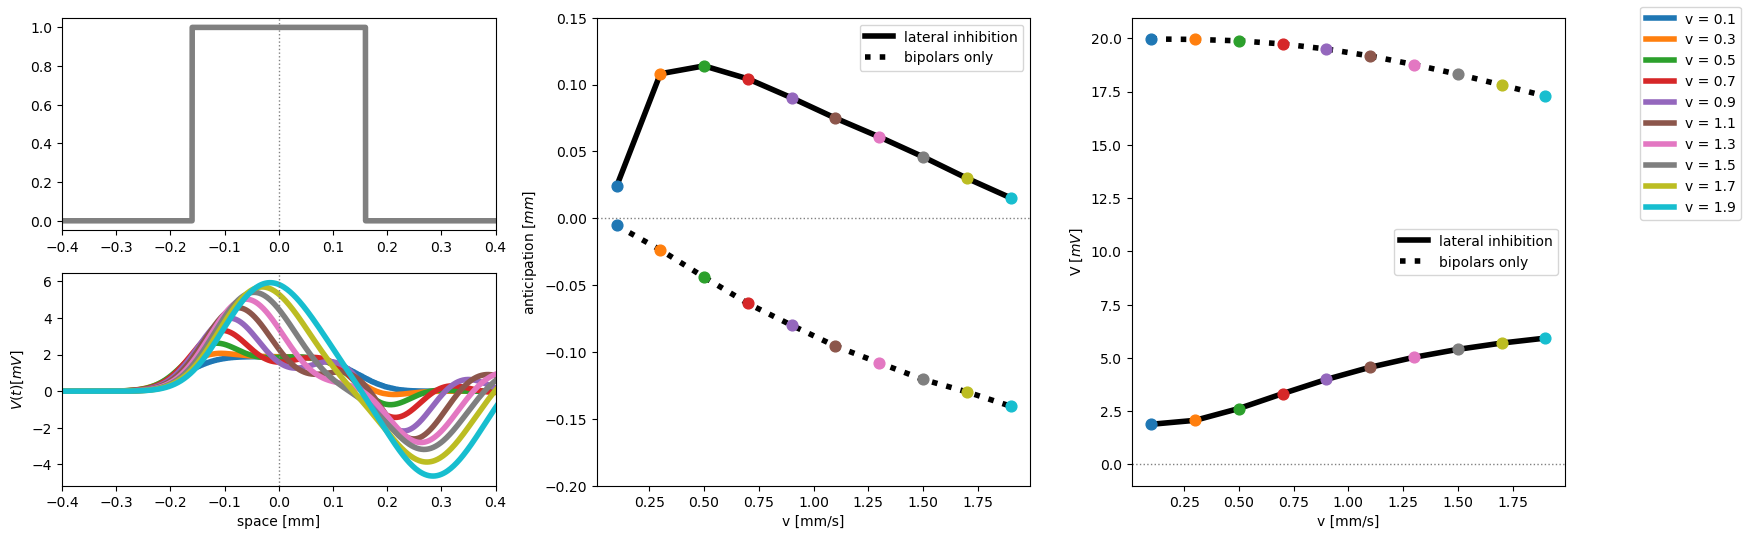

In [62]:
#initialize figure
nrows = 2
ncols = 6

fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


fig.subplots_adjust(top=0.975,
bottom=0.195,
left=0.065,
right=0.9,
hspace=0.2,
wspace=0.61)



gs = fig.add_gridspec(nrows,ncols)


ax = fig.add_subplot(gs[0,0:2])

    #add panel labels

    #remove frames that are not needed


x = 0

ti = data['times'][x]
barr = [bar(t,pos_cell, v = speeds[x]) for t in ti]
ax.plot(ti*speeds[x]  - pos_cell ,barr, linewidth = lw, color = cbar)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')


ax = fig.add_subplot(gs[1,0:2], sharex = ax)
for x,si in enumerate(speeds[:]):
    ti = data['times'][x]*si
    RG = data[net]['RB'][x]
    ax.plot(ti  - pos_cell, RG, label = f'v = {si}', linewidth = lw)
ax.axvline(0, linewidth = 1, color = cbar, linestyle = ':')
ax.set_xlabel('space [mm]')
ax.set_ylabel('$V(t) [mV]$')
ax.set_xlim(-0.4,0.4)
fig.legend()
ax = fig.add_subplot(gs[:,2:4])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['ants']['RB_bar'] * speeds
antis_pool = data[net_pool]['ants']['RB_bar'] * speeds


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('anticipation [$mm$]')





ax = fig.add_subplot(gs[:,4:])

ax.axhline(0, linewidth = 1, color = cbar, linestyle = ':')
antis = data[net]['amps']['RB']
antis_pool = data[net_pool]['amps']['RB']


ax.plot(speeds,antis, color = 'k', linewidth = lw, label = 'lateral inhibition')
ax.plot(speeds,antis_pool, color = 'k', linewidth = lw,linestyle = ':', label = 'bipolars only')
for x,si in enumerate(speeds[:]):
    p = ax.scatter(speeds[x],antis[x], s= ms, zorder = 10)
    ax.scatter(speeds[x],antis_pool[x], alpha = 1, color = p.get_facecolors(), s = ms, zorder = 10)
ax.legend()


#col = p.get_facecolors()[idx].tolist()
# ax.set_ylim(-.2,.15)
#ax.set_xscale('log')
ax.set_xlabel('v [mm/s]')
ax.set_ylabel('V [$mV$]')


In [83]:

def compute_spatiotemporal_frequencies(signal, dt, delta):

    # Perform a 2D Fourier Transform on the signal
    ft_signal = np.fft.fft2(signal)

    # Shift the zero frequency component to the center
    ft_signal_shifted = np.fft.fftshift(ft_signal)

    # Compute the magnitude (for visualization)
    magnitude_spectrum = np.abs(ft_signal_shifted)
    
    # Get the frequency components along each dimension
    spatial_freqs = np.fft.fftfreq(signal.shape[0], d=dt)
    temporal_freqs = np.fft.fftfreq(signal.shape[1], d = delta)

    return spatial_freqs, temporal_freqs, magnitude_spectrum



def plot_spatiotemporal_frequencies(spatial_freqs, temporal_freqs, magnitude_spectrum):

    plt.figure(figsize=(8, 6))
    plt.imshow(magnitude_spectrum, extent=(temporal_freqs.min(), temporal_freqs.max(), spatial_freqs.min(), spatial_freqs.max()), aspect='auto')
    plt.plot()
    plt.colorbar(label='Magnitude')
    plt.xlabel('omega')
    plt.ylabel('k')
    plt.title('Spatiotemporal Frequency Spectrum')
    plt.show()


def ghat(omega,k, v, L, s2 = -1):
    return 1j * (np.exp((-1j * (omega-k*v*s2) * (L/v)) -1) /(omega-k*v*s2) )


# def extract_resonance_speed(magnitudes): 
#     N,tps = magnitudes.shape
#     max_idx = magnitudes.argmax()
#     spacemax = max_idx // tps
#     timemax = max_idx % tps
#     return (spacemax*0.005)/(timemax*0.001) #mm/s


In [84]:
paramsi.keys()

dict_keys(['nb_cells', 'nb_GC_cells', 'saving_range', 'rf_BC', 'rf_BC_s', 'std_GC', 'std_GC_s', 'spacing', 'dt', 'speed', 'bar_width', 'stimulus_polarity', 'start_cell', 'start_tp', 'occluder_width', 'stop_pos', 'w_BC', 'w_GC', 'X0', 'tauA', 'tauB', 'tauG', 'tauOPL', 'tauOPL2', 'SF', 'input_scale', 'wAB', 'wBA', 'wGB', 'wGA', 'wGA2', 'd', 'rectification_BC', 'slope_BC', 'threshold_BC', 'rectification_AC', 'slope_GC', 'threshold_GC', 'rectification_n', 'slope_n', 'threshold_n', 'krecB', 'krelB', 'betaB', 'krecA', 'krelA', 'betaA', 'tauActB', 'hB', 'tauActA', 'hA', 'tauActG', 'hG', 'distance', 'duration', 'rf_overlap', 'cell_spacing', 'tps', 'std', 'roh', 'pos_rf_mid', 'tps_rf_mid', 'lam', 'tau_res', 'P', 'resonance_freq', 'pos_rf_GC_mid', 'tps_rf_GC_mid', 'ant_time', 'ant_space'])

In [85]:
signal = out['VB']
N, T = signal.shape
spatial_freqs, temporal_freqs, magnitude_spectrum = compute_spatiotemporal_frequencies(signal, dt = paramsi['dt'], delta = paramsi['spacing'])

omega_range = np.linspace(temporal_freqs.max(), temporal_freqs.min(), len(spatial_freqs))
krange_range = np.linspace(spatial_freqs.max(), spatial_freqs.min(), len(temporal_freqs))
omega_mat = np.zeros((len(spatial_freqs),len(temporal_freqs)))
k_mat = np.zeros((len(spatial_freqs),len(temporal_freqs)))
for row in range(len(krange_range)):
    omega_mat[:,row] = omega_range

for col in range(len(omega_range)):
    k_mat[col,:] = krange_range


v = paramsi['speed'] #1.9
L =  N * paramsi['spacing'] #100 * 0.005
ghat_mat  =ghat(omega_mat,k_mat,v,L)


In [86]:
ghat_mat.shape, magnitude_spectrum.shape

((100, 790), (100, 790))

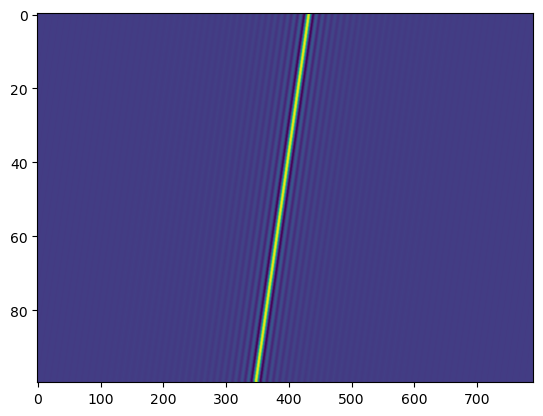

In [87]:
plt.imshow(ghat_mat.real, aspect = 'auto')

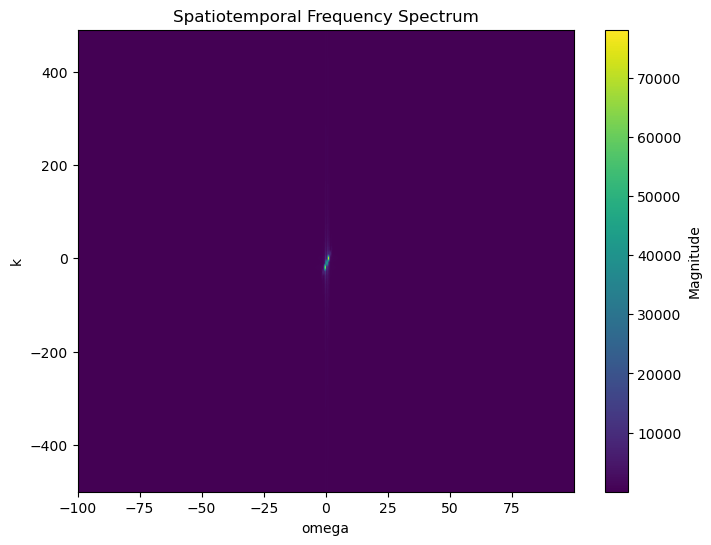

In [89]:

plot_spatiotemporal_frequencies(spatial_freqs, temporal_freqs, magnitude_spectrum)

In [73]:
N,tps = signal.shape
max_idx = magnitude_spectrum.argmax()
spacemax = max_idx // tps
timemax = max_idx % tps

# slope = 1/w of the pattern in the spectrum
# time average not zero, remove that to have a centered response. 
# divide by eq 67 on p 25 
# send bruno python code

In [74]:
(spacemax*0.005)/(timemax*0.001) #mm/s

0.6155778894472361